In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import cv2
import time

In [2]:
from google.colab import drive
from google.colab.patches import cv2_imshow
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import sys
sys.path.append('./gdrive/MyDrive/wildlife/Archeys_frogs')

In [4]:
from LandMarkDataGenerator import LandMarkDataGenerator

In [35]:
def show_labels(img, labels, radius = 5, thickness = 1):
  for i in range(0, len(labels), 2):
    point = np.round([labels[i], labels[i + 1]]).astype(int)
    point = tuple(point)
    img = cv2.circle(img, point, radius, (0, 0, 255), thickness)
    print(point)
  cv2_imshow(img * 255)

In [6]:
DB_FILE_PATH = r"./gdrive/MyDrive/wildlife/Archeys_frogs/image_path_anotations_db.pkl"
IMAGE_SIZE = (512, 512)
IMAGE_SIZE_WIDTH_INDEX = 0
IMAGE_SIZE_HEIGHT_INDEX = 1 

In [37]:
df = pd.read_pickle(DB_FILE_PATH)

In [38]:
df.head()

,image_path,x_Left_eye,y_Left_eye,x_Left_front_leg,y_Left_front_leg,x_Right_eye,y_Right_eye,x_Right_front_leg,y_Right_front_leg,x_Tip_of_snout,y_Tip_of_snout,x_Vent,y_Vent,original_width_size,original_height_size
0,/content/gdrive/MyDrive/wildlife/Archeys_frogs...,885.637756,1007.863464,970.605286,1031.211304,908.882812,885.314575,989.759521,904.002441,824.620361,926.964722,1166.535889,1006.835266,2634,1750
1,/content/gdrive/MyDrive/wildlife/Archeys_frogs...,613.908813,1019.479797,743.594849,1035.384644,622.473022,813.939697,735.030701,766.224976,489.116608,906.922119,1102.066650,893.464111,2226,1663
2,/content/gdrive/MyDrive/wildlife/Archeys_frogs...,1449.327393,778.694946,1277.386475,764.939697,1443.595947,977.000183,1271.655029,1033.167603,1582.295044,899.053650,951.844910,926.564148,2655,1870
3,/content/gdrive/MyDrive/wildlife/Archeys_frogs...,586.089966,1135.466431,809.104492,1155.289917,606.739441,923.189697,820.668152,915.755920,467.974884,1014.873474,1186.577148,1021.481262,2628,1833
4,/content/gdrive/MyDrive/wildlife/Archeys_frogs...,901.168579,1083.958740,1008.453918,1124.623291,953.946045,913.513306,1060.366211,936.873840,818.108887,958.503967,1300.893188,1126.353638,2736,1891


Resizing x,y labels to the new image size,
<br>
new_x = (new_x_size / old_x_size) * x
<br>
new_y = (new_y_size / old_y_size) * y

In [9]:
# dfx = df.filter(regex = 'x_').multiply(IMAGE_SIZE[IMAGE_SIZE_WIDTH_INDEX] / df.original_width_size, axis = 0)
# dfy = df.filter(regex = 'y_').multiply(IMAGE_SIZE[IMAGE_SIZE_WIDTH_INDEX] / df.original_height_size, axis = 0)
# df[dfx.columns] = dfx
# df[dfy.columns] = dfy

In [10]:
df.head()

,image_path,x_Left_eye,y_Left_eye,x_Left_front_leg,y_Left_front_leg,x_Right_eye,y_Right_eye,x_Right_front_leg,y_Right_front_leg,x_Tip_of_snout,y_Tip_of_snout,x_Vent,y_Vent,original_width_size,original_height_size
0,/content/gdrive/MyDrive/wildlife/Archeys_frogs...,184.363817,310.208345,210.462763,315.721074,177.839068,249.568483,212.637668,230.667748,156.089955,285.007388,281.147414,263.744034,2610,1802
1,/content/gdrive/MyDrive/wildlife/Archeys_frogs...,242.964478,289.187592,275.492167,299.978912,242.416606,246.643677,270.074483,225.683945,229.581970,266.662201,315.313578,254.880692,3072,2048
2,/content/gdrive/MyDrive/wildlife/Archeys_frogs...,179.808473,263.637788,197.899068,274.621584,185.615329,218.482165,210.852836,212.685165,164.174605,236.483403,259.764501,252.348890,2724,1994
3,/content/gdrive/MyDrive/wildlife/Archeys_frogs...,158.314964,230.518247,186.623978,236.728181,168.862260,181.693131,191.739988,181.309509,143.044724,193.150883,248.618005,234.804072,2600,1776
4,/content/gdrive/MyDrive/wildlife/Archeys_frogs...,280.785522,282.666239,283.019257,256.402181,230.978363,286.995097,214.759583,265.090068,259.878998,303.556986,243.851669,198.385437,2048,3072


In [39]:
dt = LandMarkDataGenerator(dataframe = df,
                        x_col = "image_path",
                        y_col = df.columns.to_list()[1:],
                        color_mode = "rgb",
                        target_size = IMAGE_SIZE,
                        batch_size = 4,
                        rotate = (0,30),
                        scale = (0.8,1.0),
                        translate_percent = (0,0.2),
                        training = True,
                        resize_points = True)

Found 542 validated image filenames.


In [40]:
x, y = dt.__getitem__(1)

(198, 264)
(223, 290)
(226, 223)
(257, 241)
(194, 229)
(290, 300)


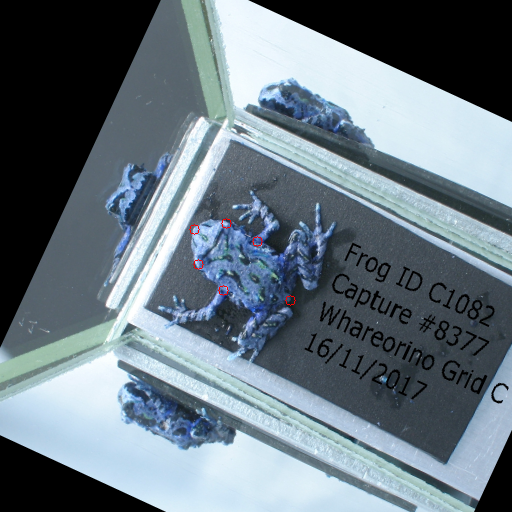

(199, 308)
(257, 339)
(237, 240)
(292, 254)
(190, 249)
(380, 345)


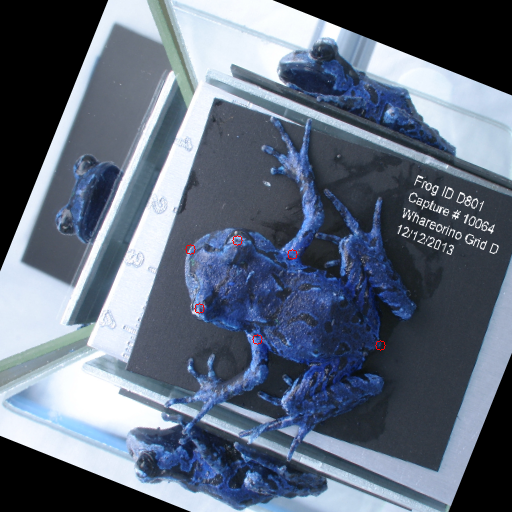

(325, 339)
(336, 356)
(351, 305)
(368, 321)
(327, 306)
(385, 374)


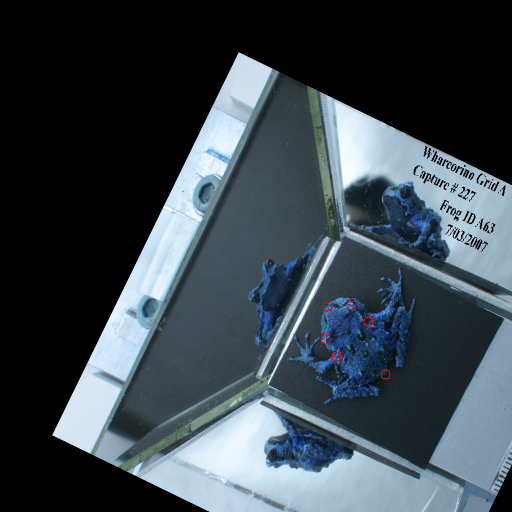

In [41]:
for i in range(3):
  show_labels(x[i], y[i])